In [1]:
# Import libraries

#......................................................................................
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#......................................................................................
from sklearn.preprocessing import MinMaxScaler
#......................................................................................
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#......................................................................................
from sklearn.metrics import silhouette_samples, silhouette_score
#......................................................................................
import warnings
warnings.filterwarnings("ignore")

In [2]:
address=r"F:\Tutorials\Certified program in MACHINE LEARNING and ARTIFICIAL INTELLIGENCE\Assignments\assignment_3\Wholesale customers data.csv"
data=pd.read_csv(address)

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
col=['Channel', 'Region']
for i in col:
    print(data[i].unique())

[2 1]
[3 1 2]


In [8]:
# one hot encoding of categorical variables and removing redundant column
data_modified=pd.get_dummies(data, prefix=['C', 'R'], columns=['Channel', 'Region'])
data_modified=data_modified.drop(columns=['C_2','R_3'])

<AxesSubplot:>

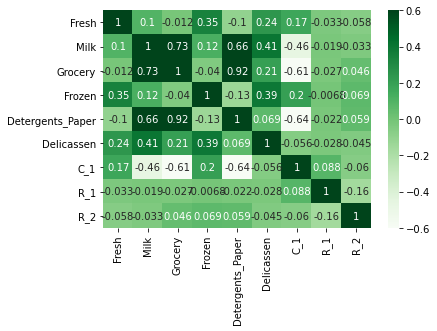

In [9]:
# check correlation between columns and drop column with high correlation
corrMatrix=data_modified.corr()
corrMatrix
plt.subplot()
sns.heatmap(corrMatrix,annot=True,cmap='Greens',vmax=0.6,vmin=-0.6)

In [10]:
data_modified=data_modified.drop(columns=['Grocery'])


In [11]:
# scale dataset
sc=MinMaxScaler()
data_modified=sc.fit_transform(data_modified)
data_modified=pd.DataFrame(data_modified)

### K-Means Clustering

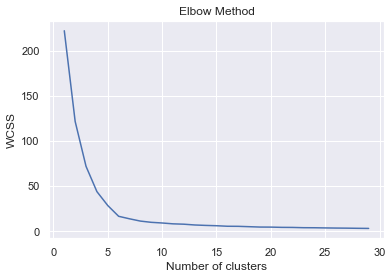

In [12]:
# Find best n_clusters with elbow method

wcss = [] #Within Cluster Sum of Squares (WCSS)
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(data_modified)
    wcss.append(kmeans.inertia_)
sns.set()    
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
model=KMeans(n_clusters=6,init='k-means++',random_state=9)
model.fit(data_modified)
pred=model.fit_predict(data_modified)
pd.DataFrame(pred).value_counts()



1    211
2    105
0     59
3     28
4     19
5     18
dtype: int64

In [14]:
# function to find silhouette score 

def silhouette_Score(range_n_clusters,X,model):
    silhouette_coefficients=[]  
    for n_clusters in range_n_clusters:
        
        clusterer = model
        clusterer.set_params(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
        silhouette_coefficients.append(silhouette_avg)   
    sns.set()    
    plt.plot(range_n_clusters, silhouette_coefficients)
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()    
                    

For n_clusters = 2 The average silhouette_score is : 0.5418842863256085
For n_clusters = 3 The average silhouette_score is : 0.6481920757272706
For n_clusters = 4 The average silhouette_score is : 0.7139900785836899
For n_clusters = 5 The average silhouette_score is : 0.7540894385209467
For n_clusters = 6 The average silhouette_score is : 0.8053783997392479
For n_clusters = 7 The average silhouette_score is : 0.7908341446855242
For n_clusters = 8 The average silhouette_score is : 0.6683358971423935
For n_clusters = 9 The average silhouette_score is : 0.6536377145461467
For n_clusters = 10 The average silhouette_score is : 0.655475843186977
For n_clusters = 11 The average silhouette_score is : 0.5429455692056369


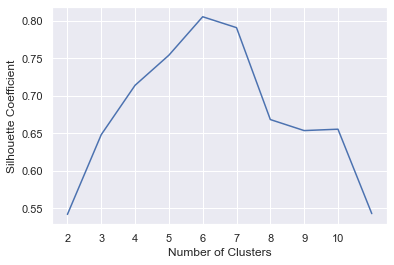

In [15]:

range_n_clusters = list(range(2,12))
silhouette_Score(range_n_clusters,data_modified,KMeans())

### Hierarchical Clustering 

For n_clusters = 2 The average silhouette_score is : 0.4777340029716489
For n_clusters = 3 The average silhouette_score is : 0.6123819801386297
For n_clusters = 4 The average silhouette_score is : 0.7139900785836899
For n_clusters = 5 The average silhouette_score is : 0.7626967034630755
For n_clusters = 6 The average silhouette_score is : 0.8053783997392479
For n_clusters = 7 The average silhouette_score is : 0.8021419821454404
For n_clusters = 8 The average silhouette_score is : 0.6203825296011197
For n_clusters = 9 The average silhouette_score is : 0.6195258108472586
For n_clusters = 10 The average silhouette_score is : 0.6112074937523972
For n_clusters = 11 The average silhouette_score is : 0.6121812549728203


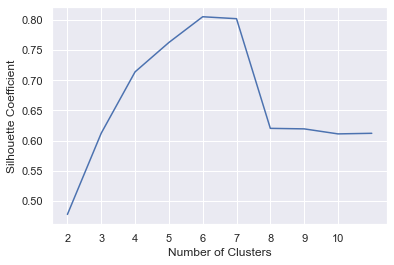

In [16]:

range_n_clusters = list(range(2,12))
silhouette_Score(range_n_clusters,data_modified,AgglomerativeClustering())

In [17]:
ac = AgglomerativeClustering(n_clusters = 6)
ac.fit(data_modified)
pred = ac.fit_predict(data_modified)


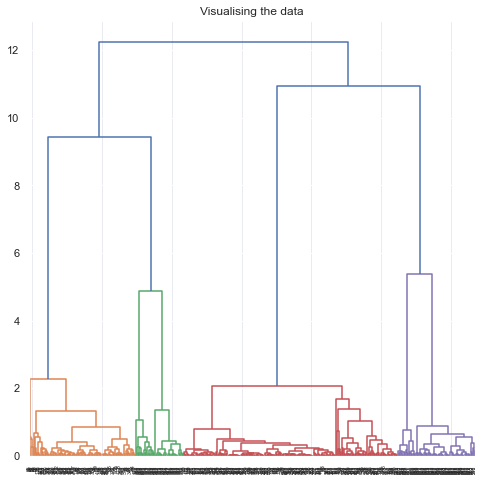

In [18]:
# dendrogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data_modified, method ='ward')))

In [19]:
pd.DataFrame(pred).value_counts()

2    211
0    105
3     59
1     28
5     19
4     18
dtype: int64